In [2]:
from prophet import Prophet
import pandas as pd

In [3]:
data = pd.read_csv('Downloads\MultiStoreProductForecasting-with-Prophet-main\dataset.csv')

In [4]:
data

,Date,Store/Product,Value
0,20180101,LOS_ANGELES-TESLA_MODEL_X,2926.000000
1,20180102,LOS_ANGELES-TESLA_MODEL_X,2687.531000
2,20180103,LOS_ANGELES-TESLA_MODEL_X,2793.000000
3,20180104,LOS_ANGELES-TESLA_MODEL_X,2394.000000
4,20180105,LOS_ANGELES-TESLA_MODEL_X,2660.000000
...,...,...,...
3235,20201212,SAN_FRANCISCO-TESLA_MODEL_S,2899.835050
3236,20201213,SAN_FRANCISCO-TESLA_MODEL_S,2896.835050
3237,20201214,SAN_FRANCISCO-TESLA_MODEL_S,3094.019060
3238,20201215,SAN_FRANCISCO-TESLA_MODEL_S,2492.132196


In [5]:
data['Store/Product'].value_counts() #so, 3 tpes of products

LOS_ANGELES-TESLA_MODEL_X      1080
LOS_ANGELES-TESLA_MODEL_S      1080
SAN_FRANCISCO-TESLA_MODEL_S    1080
Name: Store/Product, dtype: int64

In [6]:
data.isna().sum() #so, no missing values

Date             0
Store/Product    0
Value            0
dtype: int64

In [7]:
data.dtypes

Date               int64
Store/Product     object
Value            float64
dtype: object

# Converting string 'Date' column into YYYY-MM-DD format 

In [8]:
data['Date'] = data['Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d')) 

In [9]:
data

,Date,Store/Product,Value
0,2018-01-01,LOS_ANGELES-TESLA_MODEL_X,2926.000000
1,2018-01-02,LOS_ANGELES-TESLA_MODEL_X,2687.531000
2,2018-01-03,LOS_ANGELES-TESLA_MODEL_X,2793.000000
3,2018-01-04,LOS_ANGELES-TESLA_MODEL_X,2394.000000
4,2018-01-05,LOS_ANGELES-TESLA_MODEL_X,2660.000000
...,...,...,...
3235,2020-12-12,SAN_FRANCISCO-TESLA_MODEL_S,2899.835050
3236,2020-12-13,SAN_FRANCISCO-TESLA_MODEL_S,2896.835050
3237,2020-12-14,SAN_FRANCISCO-TESLA_MODEL_S,3094.019060
3238,2020-12-15,SAN_FRANCISCO-TESLA_MODEL_S,2492.132196


In [10]:
data.dtypes

Date             datetime64[ns]
Store/Product            object
Value                   float64
dtype: object

In [11]:
frame = data[data['Store/Product'] == 'LOS_ANGELES-TESLA_MODEL_X'].copy() #just slicing the main DF and copying it to frame. not making real changes to main DF

In [12]:
frame

,Date,Store/Product,Value
0,2018-01-01,LOS_ANGELES-TESLA_MODEL_X,2926.000000
1,2018-01-02,LOS_ANGELES-TESLA_MODEL_X,2687.531000
2,2018-01-03,LOS_ANGELES-TESLA_MODEL_X,2793.000000
3,2018-01-04,LOS_ANGELES-TESLA_MODEL_X,2394.000000
4,2018-01-05,LOS_ANGELES-TESLA_MODEL_X,2660.000000
...,...,...,...
1075,2020-12-12,LOS_ANGELES-TESLA_MODEL_X,3167.594500
1076,2020-12-13,LOS_ANGELES-TESLA_MODEL_X,3167.594500
1077,2020-12-14,LOS_ANGELES-TESLA_MODEL_X,3383.354511
1078,2020-12-15,LOS_ANGELES-TESLA_MODEL_X,2714.591329


In [13]:
data

,Date,Store/Product,Value
0,2018-01-01,LOS_ANGELES-TESLA_MODEL_X,2926.000000
1,2018-01-02,LOS_ANGELES-TESLA_MODEL_X,2687.531000
2,2018-01-03,LOS_ANGELES-TESLA_MODEL_X,2793.000000
3,2018-01-04,LOS_ANGELES-TESLA_MODEL_X,2394.000000
4,2018-01-05,LOS_ANGELES-TESLA_MODEL_X,2660.000000
...,...,...,...
3235,2020-12-12,SAN_FRANCISCO-TESLA_MODEL_S,2899.835050
3236,2020-12-13,SAN_FRANCISCO-TESLA_MODEL_S,2896.835050
3237,2020-12-14,SAN_FRANCISCO-TESLA_MODEL_S,3094.019060
3238,2020-12-15,SAN_FRANCISCO-TESLA_MODEL_S,2492.132196


In [14]:
frame.drop('Store/Product',axis=1,inplace=True)

In [15]:
frame

,Date,Value
0,2018-01-01,2926.000000
1,2018-01-02,2687.531000
2,2018-01-03,2793.000000
3,2018-01-04,2394.000000
4,2018-01-05,2660.000000
...,...,...
1075,2020-12-12,3167.594500
1076,2020-12-13,3167.594500
1077,2020-12-14,3383.354511
1078,2020-12-15,2714.591329


In [16]:
frame.columns = ['ds','y'] #renaming the columns as we will pass it to our prophet time series model

In [17]:
frame

,ds,y
0,2018-01-01,2926.000000
1,2018-01-02,2687.531000
2,2018-01-03,2793.000000
3,2018-01-04,2394.000000
4,2018-01-05,2660.000000
...,...,...
1075,2020-12-12,3167.594500
1076,2020-12-13,3167.594500
1077,2020-12-14,3383.354511
1078,2020-12-15,2714.591329


# Training the model

In [18]:
model = Prophet(interval_width = 0.95)

In [19]:
train = model.fit(frame)

16:11:03 - cmdstanpy - INFO - Chain [1] start processing
16:11:04 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
train

# Evaluate the model

In [21]:
future = train.make_future_dataframe(periods=400,freq='D') #creating dataframe to predict next 400 days 

In [22]:
forecast = train.predict(future)

In [23]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3509.280332,800.903665,3993.341608,3509.280332,3509.280332,-1110.354617,-1110.354617,-1110.354617,16.633277,16.633277,16.633277,-1126.987894,-1126.987894,-1126.987894,0.0,0.0,0.0,2398.925715
1,2018-01-02,3510.042402,831.385646,3899.114132,3510.042402,3510.042402,-1120.439700,-1120.439700,-1120.439700,-11.260984,-11.260984,-11.260984,-1109.178717,-1109.178717,-1109.178717,0.0,0.0,0.0,2389.602702
2,2018-01-03,3510.804472,913.801213,4000.515477,3510.804472,3510.804472,-1094.562889,-1094.562889,-1094.562889,-4.379432,-4.379432,-4.379432,-1090.183457,-1090.183457,-1090.183457,0.0,0.0,0.0,2416.241583
3,2018-01-04,3511.566543,925.004343,3938.760093,3511.566543,3511.566543,-1047.622548,-1047.622548,-1047.622548,22.456881,22.456881,22.456881,-1070.079429,-1070.079429,-1070.079429,0.0,0.0,0.0,2463.943995
4,2018-01-05,3512.328613,772.289374,4022.092911,3512.328613,3512.328613,-1083.588816,-1083.588816,-1083.588816,-34.592185,-34.592185,-34.592185,-1048.996632,-1048.996632,-1048.996632,0.0,0.0,0.0,2428.739797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,2022-01-16,5028.815878,2718.381692,5829.313084,5004.165652,5053.747075,-798.168633,-798.168633,-798.168633,25.202764,25.202764,25.202764,-823.371397,-823.371397,-823.371397,0.0,0.0,0.0,4230.647245
1476,2022-01-17,5029.890482,2653.087120,5735.026996,5005.158997,5054.933187,-793.872722,-793.872722,-793.872722,16.633277,16.633277,16.633277,-810.505999,-810.505999,-810.505999,0.0,0.0,0.0,4236.017760
1477,2022-01-18,5030.965085,2649.977711,5851.351559,5006.152341,5056.119299,-811.030849,-811.030849,-811.030849,-11.260984,-11.260984,-11.260984,-799.769865,-799.769865,-799.769865,0.0,0.0,0.0,4219.934237
1478,2022-01-19,5032.039689,2514.508357,5809.992943,5007.145686,5057.305412,-795.582660,-795.582660,-795.582660,-4.379432,-4.379432,-4.379432,-791.203229,-791.203229,-791.203229,0.0,0.0,0.0,4236.457029


# Visualize the trends

In [25]:
import plotly as plt

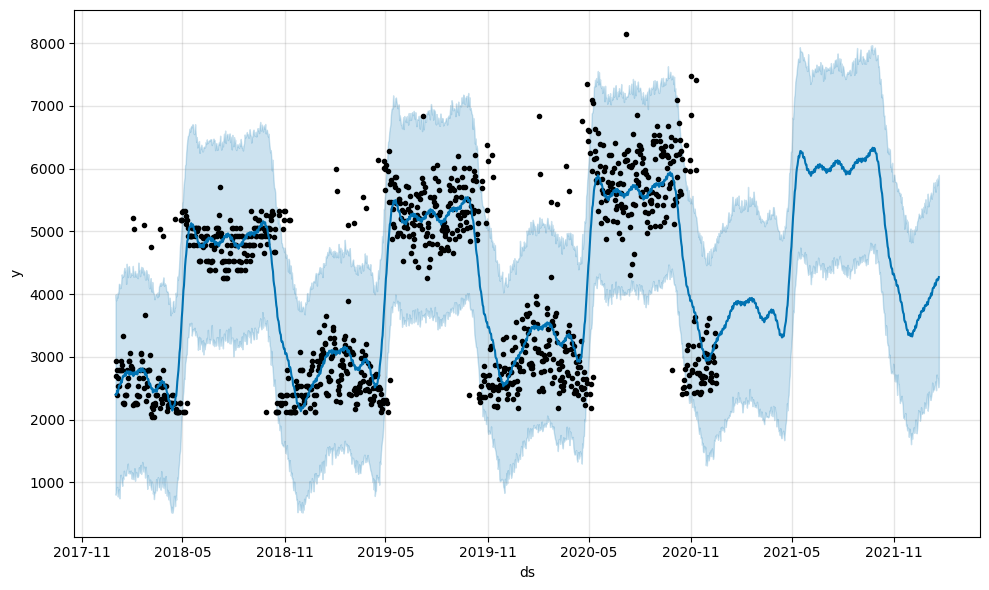

In [26]:
plot1 = model.plot(forecast)

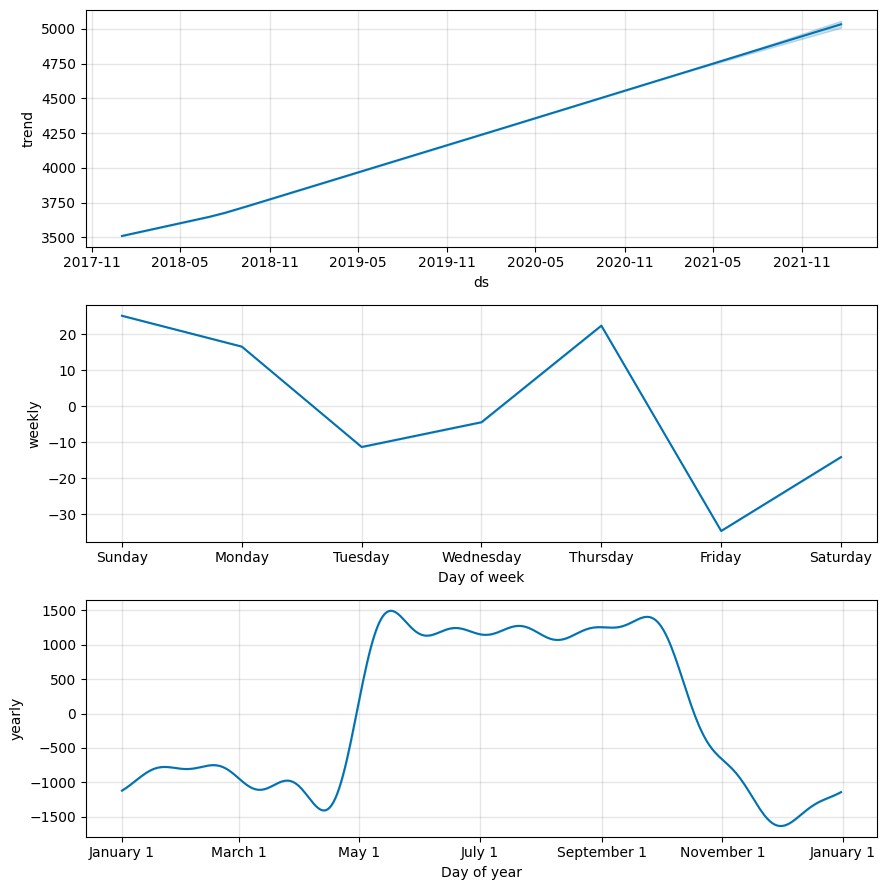

In [27]:
plot2 = model.plot_components(forecast)